In [50]:
import numpy as np
from sldata import SessionData
import matplotlib.pyplot as plt
import sys

### Populate SessionData

In [103]:
mouse_id = "7003"
session_id = "m4"
experiment = "clickbait-motivate"

print("=== Testing SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    min_spikes=50,
    verbose=True)

=== Testing SessionData Class ===
Loading data for 7003_m4...
Successfully loaded spike_times from S:\clickbait-motivate\kilosorted\7003\m4\spike_times.npy
Successfully loaded spike_templates from S:\clickbait-motivate\kilosorted\7003\m4\spike_templates.npy
Successfully loaded templates from S:\clickbait-motivate\kilosorted\7003\m4\templates.npy
Successfully loaded sniff from S:\clickbait-motivate\preprocessed\7003\m4\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Successfully loaded events from S:\clickbait-motivate\bonsai\7003\m4\events.csv
Video properties: 888x1968, 30.0 FPS, 78980 frames
Filtering and decimating sniff signal from 30kHz to 1kHz...
Found 19197 peaks in sniff signal
Peak times range: 88.0 - 2658215.0 ms
Loaded 25 clusters for 7003_m4
Loaded sniff data: 2658420 samples
Found 19197 sniff events


### Sniff Signal

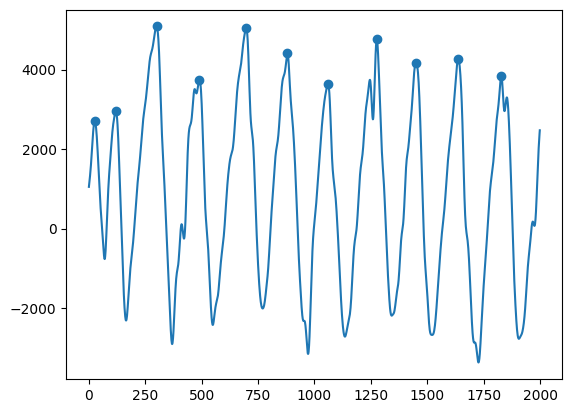

In [104]:
start = 5000
end = 7000
sniffs = np.array([round(x) for x in data.sniff_times if start < x < end])

plt.plot(data.sniff[start:end])
plt.scatter(sniffs-start, data.sniff[sniffs])

Created population matrix: 25 neurons x 1000 time bins
Time range: 1200000.0 - 1250000.0 ms
Bin size: 50 ms
Applied z-scoring to neurons


Text(0.5, 0, '50ms bins')

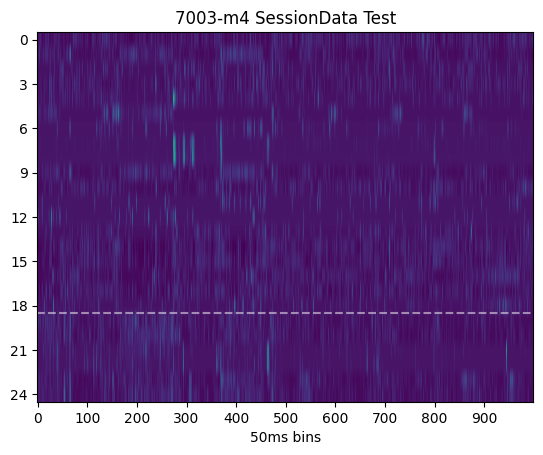

In [105]:
### Population Raster
start_time=1000*1200
end_time=start_time+50000 
bin_size_ms=50

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=True,
    cluster_ids=None
)

from matplotlib.ticker import MaxNLocator
# Check when regions switch
for ii in range(len(data.clusters)):
    if data.clusters[ii]['best_channel'] > 16:
        region_line = ii
        break

plt.imshow(pop_matrix, aspect='auto')
plt.xticks(range(pop_matrix.shape[1]))  # One tick per column
plt.yticks(range(pop_matrix.shape[0]))  # One tick per row
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.axhline(region_line-.5, c='w', linestyle='dashed', alpha=.5)
plt.title(f"{mouse_id}-{session_id} SessionData Test")
plt.xlabel(f"{bin_size_ms}ms bins")

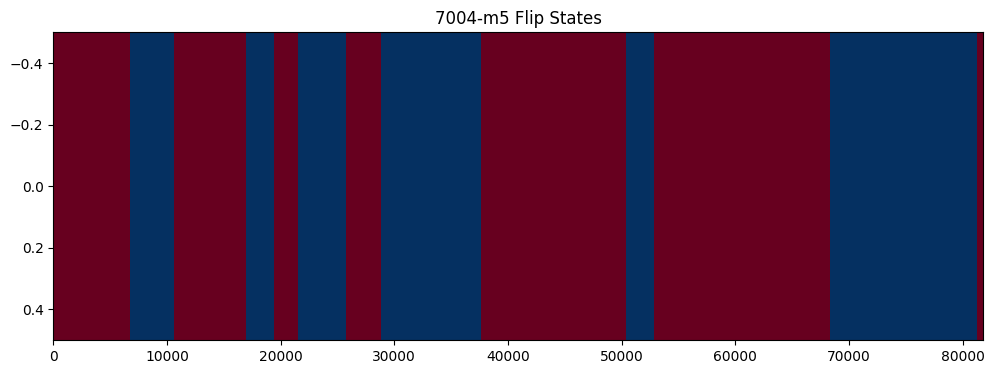

In [76]:
flip_state = np.expand_dims(data.events['flip_state'], axis=0)
#flip_state_2d = np.tile(flip_state, (1, 1))  
plt.figure(figsize=(12, 4))
plt.imshow(flip_state, cmap='RdBu', aspect='auto', interpolation='nearest')
plt.title(f"{mouse_id}-{session_id} Flip States")
plt.show()

In [55]:
data.clusters[12]['n_spikes']

25237

Created sniff-locked raster for cluster 11: (20165, 1001) (sniffs x timesteps)


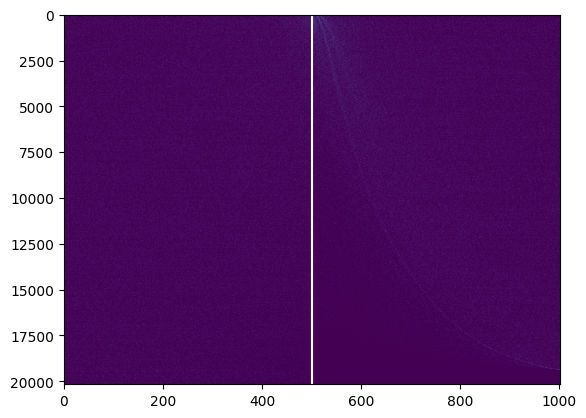

In [56]:
sniff_locked = data.create_sniff_locked_raster(cluster_idx=11, window_ms=500)
plt.imshow(sniff_locked, aspect='auto')
plt.axvline(500, color='w')

Created scatter data: 330412 spikes across 1 clusters and 20165 sniff events


\\wsl.localhost\Ubuntu-20.04\home\nghess\git-repos\sl-data\src\sldata\SessionData.py:1418: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0)


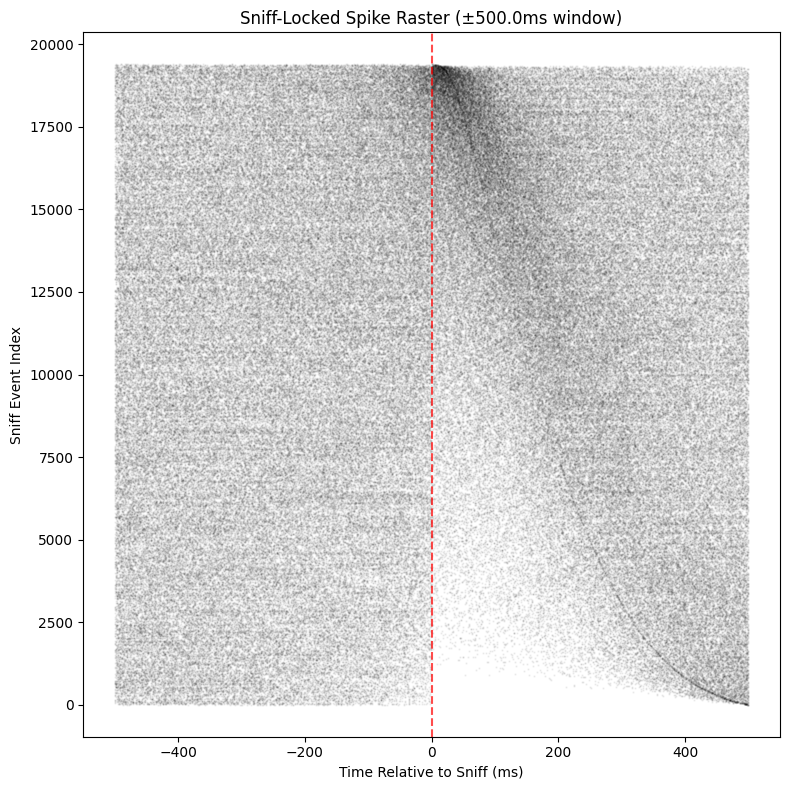

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Sniff-Locked Spike Raster (±500.0ms window)'}, xlabel='Time Relative to Sniff (ms)', ylabel='Sniff Event Index'>)

In [57]:
data.plot_sniff_locked_scatter(cluster_indices=[11])

### Cluster Attribute

In [58]:
data.clusters[5]

{'cluster_id': 5,
 'best_channel': 6,
 'spike_times': array([2.83333333e+01, 3.62333333e+01, 1.32966667e+02, ...,
        2.66348620e+06, 2.66348883e+06, 2.66351027e+06]),
 'waveform_template': array([ 0.34938768,  0.36389202,  0.37676686,  0.37998825,  0.38111103,
         0.39880627,  0.41960838,  0.4537896 ,  0.4837423 ,  0.5400718 ,
         0.6647555 ,  0.8514803 ,  1.0478613 ,  1.1467543 ,  1.04034   ,
         0.5784557 , -0.3334976 , -1.5902905 , -3.0327115 , -4.070744  ,
        -4.376531  , -3.8823423 , -3.0217605 , -2.134238  , -1.4460497 ,
        -0.92995024, -0.4723702 , -0.03402047,  0.34325054,  0.5875129 ,
         0.7205553 ,  0.7789974 ,  0.806998  ,  0.83678496,  0.8740407 ,
         0.8825655 ,  0.86288035,  0.8359646 ,  0.79428774,  0.75627464,
         0.7151281 ,  0.6619964 ,  0.5951323 ,  0.5320768 ,  0.47818816,
         0.4406355 ,  0.3968019 ,  0.35463917,  0.31870145,  0.29149786,
         0.2648859 ,  0.2353121 ,  0.19585326,  0.15474327,  0.13237247,
    

### Cluster Filtering

In [59]:
hc_data = data.filter_clusters('best_channel <= 16')
ob_data = data.filter_clusters('best_channel > 16')

Filtered from 25 to 16 clusters using: best_channel <= 16
Filtered from 25 to 9 clusters using: best_channel > 16


### Bonsai Events

In [60]:
import pandas as pd

sum(pd.isna(data.events['target_cell']))

42357

In [61]:
test = pd.DataFrame()
test['reward_state'] = (pd.isna(data.events['target_cell']) & 
                                (data.events['iti'] == False))

len(test[test['reward_state'] == True])

37466

In [62]:
print(len(data.events[data.events['reward_state'] == False]))
print(len(data.events[data.events['drinking'] == True]))

49549
6093


### Event Filtering

In [63]:
flip_state_0 = data.filter_events('flip_state == False')
flip_state_1 = data.filter_events('flip_state == True')

Filtered spikes with condition 'flip_state == False': 291629/749301 spikes retained
Filtered spikes with condition 'flip_state == True': 453626/749301 spikes retained


In [64]:
# Do we want to retain original events df or filter it?
print(len(flip_state_0.events))
print(len(flip_state_1.events))

79488
79488


In [65]:
flip_1_df = data.events[data.events['flip_state'] == True] 
flip_0_df = data.events[data.events['flip_state'] == False] 

In [66]:
print(len(flip_1_df))
print(len(flip_0_df))
print(np.median(flip_0_df['bonsai_centroid_y']))
print(np.median(flip_1_df['bonsai_centroid_y']))


48092
31396


KeyError: 'centroid_y'

In [34]:
hc_data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,water_left,water_right,reward_state,click,flip_state,speed,direction,drinking,timestamp_ms
0,0,2025-06-25 15:14:23.264371200,False,False,672,303,16.0,False,True,False,False,False,False,0.000000,0.000000,False,8259
1,0,2025-06-25 15:14:23.298073600,False,False,679,291,16.0,False,True,False,False,False,False,13.892444,1.570689,False,8292
2,0,2025-06-25 15:14:23.327820800,False,False,682,279,16.0,False,True,False,False,False,False,12.369317,1.570751,False,8325
3,0,2025-06-25 15:14:23.348633600,False,False,675,275,16.0,False,True,False,False,False,False,8.062258,0.785421,False,8359
4,0,2025-06-25 15:14:23.370880000,False,False,672,275,16.0,False,True,False,False,False,False,3.000000,0.000000,False,8392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78904,38,2025-06-25 15:58:13.646528000,False,False,484,1657,40.0,False,False,False,False,False,True,0.000000,0.000000,False,2638384
78905,38,2025-06-25 15:58:13.681881600,False,False,484,1658,40.0,False,False,False,False,False,True,1.000000,1.570796,False,2638417
78906,38,2025-06-25 15:58:13.720460800,False,False,483,1658,40.0,False,False,False,False,False,True,1.000000,0.000000,False,2638451
78907,38,2025-06-25 15:58:13.748121600,False,False,483,1658,40.0,False,False,False,False,False,True,0.000000,0.000000,False,2638484


In [41]:
flip_t, flip_f = data.filter_events('flip_state == True', return_false_condition=True)

Filtered spikes with condition 'flip_state == True': 409563/874871 spikes retained
False condition spikes: 457946/874871 spikes


### Alignment Inspection

In [36]:
# from scipy.signal import decimate

# reward_path = f"S:/{experiment}/preprocessed/{mouse_id}/{session_id}/reward.npy"
# reward_raw = np.load(reward_path)
# reward_1khz = decimate(reward_raw, 30, ftype='iir', zero_phase=True)

In [37]:
# # Covert voltages to bool
# start = data.events['timestamp_ms'][0]
# reward_bool = np.zeros_like(reward_1khz)
# reward_idx = np.where(reward_1khz > 0)
# reward_bool[reward_idx] = 1
# reward_bool[:start+25000] = 0  # Clean up initial reward noise (find a clean solution for this)
# reward_transition = np.where(np.diff(reward_bool) == 1)[0]
# reward_transition[0] # First reward state transition

In [38]:
# # Preview reward state boolean
# plt.plot(reward_bool[:1000*250])
# plt.axvline(data.events['timestamp_ms'][0], color='r', linestyle='--')
# plt.axvline(reward_transition[0], color='g', linestyle='--')
# plt.title('Start of Video and First Reward')
# plt.show()

In [39]:
# # Pick a transition to check
# reward_state_transition = reward_transition[-1]
# print(reward_state_transition)

In [40]:
# # Check for reward state transition in events dataframe
# data.events[data.events['timestamp_ms'].between(reward_state_transition-120, reward_state_transition+120)]